In [1]:
import  requests
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url="https://disease.sh/v3/covid-19/countries"               # Fetching the URl
responses = requests.get(url)
data= responses.json()

In [3]:
df= pd.DataFrame(data)                                      # turning the API data in to dataFramedf.
df.head(3)

,updated,country,countryInfo,cases,todayCases,deaths,todayDeaths,recovered,todayRecovered,active,...,tests,testsPerOneMillion,population,continent,oneCasePerPeople,oneDeathPerPeople,oneTestPerPeople,activePerOneMillion,recoveredPerOneMillion,criticalPerOneMillion
0,1754310877862,Afghanistan,"{'_id': 4, 'iso2': 'AF', 'iso3': 'AFG', 'lat':...",234174,0,7996,0,211080,0,15098,...,1390730,34125,40754388,Asia,174,5097,29,370.46,5179.32,0.0
1,1754310877856,Albania,"{'_id': 8, 'iso2': 'AL', 'iso3': 'ALB', 'lat':...",334863,0,3605,0,330233,0,1025,...,1941032,677173,2866374,Europe,9,795,1,357.59,115209.32,0.0
2,1754310877858,Algeria,"{'_id': 12, 'iso2': 'DZ', 'iso3': 'DZA', 'lat'...",272010,0,6881,0,183061,0,82068,...,230960,5093,45350148,Africa,167,6591,196,1809.65,4036.61,0.0


In [4]:
df. info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   updated                 231 non-null    int64  
 1   country                 231 non-null    object 
 2   countryInfo             231 non-null    object 
 3   cases                   231 non-null    int64  
 4   todayCases              231 non-null    int64  
 5   deaths                  231 non-null    int64  
 6   todayDeaths             231 non-null    int64  
 7   recovered               231 non-null    int64  
 8   todayRecovered          231 non-null    int64  
 9   active                  231 non-null    int64  
 10  critical                231 non-null    int64  
 11  casesPerOneMillion      231 non-null    int64  
 12  deathsPerOneMillion     231 non-null    int64  
 13  tests                   231 non-null    int64  
 14  testsPerOneMillion      231 non-null    in

In [5]:
df= df[['country', 'cases','todayCases','deaths','todayDeaths','recovered']]         # Clean and filter the data
df_sorted=df.sort_values('cases',ascending= False)
top_10 = df_sorted.head(10)
top_10

,country,cases,todayCases,deaths,todayDeaths,recovered
218,USA,111820082,0,1219487,0,109814428
94,India,45035393,0,533570,0,0
71,France,40138560,0,167642,0,39970918
77,Germany,38828995,0,183027,0,38240600
26,Brazil,38743918,0,711380,0,36249161
171,S. Korea,34571873,0,35934,0,34535939
103,Japan,33803572,0,74694,0,0
101,Italy,26723249,0,196487,0,26361218
217,UK,24910387,0,232112,0,24678275
168,Russia,24124215,0,402756,0,23545818


In [6]:
df_sorted.to_csv('covid_19 data.csv', index=False)  # save full cleaned data csv file 

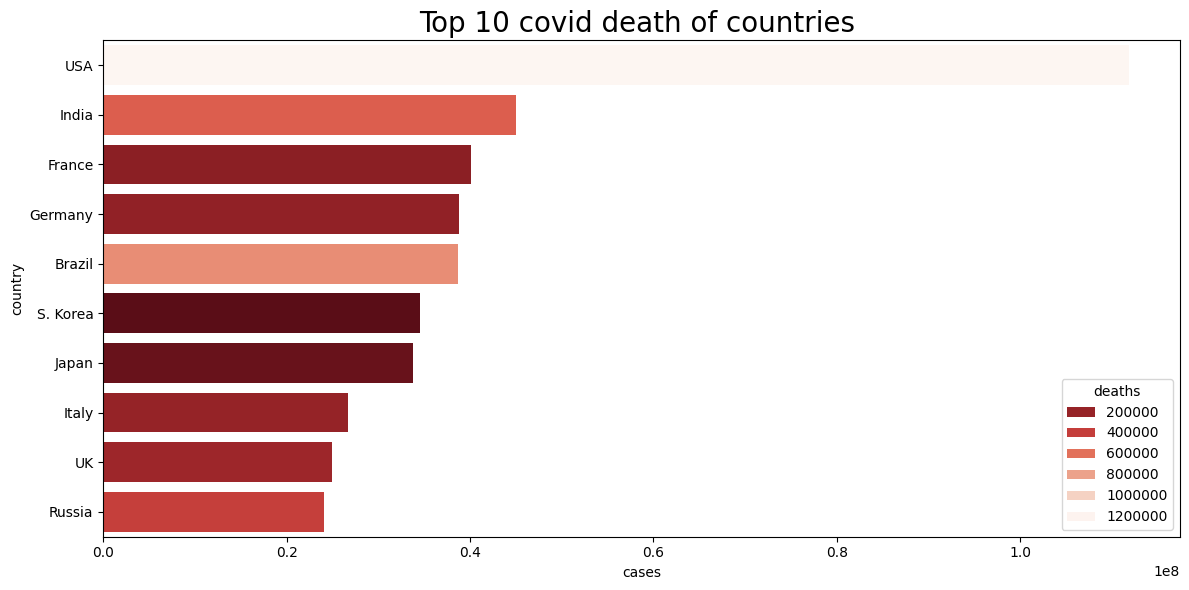

In [7]:
plt.figure(figsize=(12,6))                                         # visualiation with barblot.
sns.barplot(x='cases', y='country', data=top_10, hue='deaths',palette='Reds_r')
plt.title('Top 10 covid death of countries ', size =20)
plt.tight_layout()
plt.show()

In [8]:
plt.savefig("top10_covid_cases.png")  # save this figure

<Figure size 640x480 with 0 Axes>

In [ ]:
country_name= input("Enter your country name: ")
country_data= df[df['country'].str.lower()==country_name.lower()]

if not country_data.empty:
    print('\n COVID 19 Status:')
    print(country_data.to_string(index= False))
else:
    print('Country not found. Please check the name.')